In [1]:
import pandas as pd
import os
from IPython.display import Image
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
from cycler import cycler
import gudhi as gd
# import Plotting_QC
# from Plotting_QC import preprocess_matrix

In [4]:
# # Print all matrices with NaN values

# for person in data:
    
#     matrix = preprocess_matrix(path_data, person)

Inspect Connectivity matrices:
- Contains NaN values?

In [172]:
path_data = '/data/KNW/KNW-stage/m.schepers/HCP/HCP_100_matrices/'

data = []
for filename in os.listdir(path_data):
    data.append(filename)

In [173]:
len(data)

100

In [229]:
def import_cmatrix(path_dir, person):
    path = path_dir + person
    cmatrix = np.loadtxt(path, skiprows=0)
    
    if cmatrix.shape[0] != cmatrix.shape[1]:
        raise Exception('Error: imported connectitivy matrix is not square. \n'
              'Consider removing the top rows if it contains a header \n'
              'See function import_cmatrix: adjust skiprows')
        
    return cmatrix

def preprocess_matrix(path_data, person):
    
    matrix = import_cmatrix(path_data, person)
    matrix = abs(matrix)  
    matrix = 1 - matrix 
#     matrix = np.fill_diagonal(matrix, 1)
    np.fill_diagonal(matrix, 1)
    
    if np.any(np.isnan(matrix)):
        print(f'{person} connectivity matrix contains nan value')
    
    
    return matrix

In [228]:
def calculate_persistence(dmatrix, make_plots):

    rips_complex = gd.RipsComplex(distance_matrix=dmatrix, max_edge_length=1)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=nr_dimensions)
    diag = simplex_tree.persistence()
    
    if make_plots == 1:
        gd.plot_persistence_barcode(diag, legend=True)
        plt.savefig(path_plots + 'Persistence_barcode_' + person + '.png')
        # plt.show()
        plt.close()
        plt.show()
        gd.plot_persistence_diagram(diag, legend=True)
        plt.savefig(path_plots + 'Persistence_diagram_' + person + '.png')
        # plt.show()
        plt.close()
    
    return diag, simplex_tree

def persistence_per_dim(tr, nr_dimension):
    diag_list = []
    
    for dimension in range(nr_dimensions):
        diag = tr.persistence_intervals_in_dimension(dimension)
        
        if dimension == 0:
            diag = np.where(np.isinf(diag), -1, diag)
            max_val_dim0 = np.max(diag)
        
        if diag.shape != (0,):
            diag = np.where(np.isinf(diag), -1, diag)
            # max_val = np.max(diag)
            diag = np.where(diag == -1, max_val_dim0, diag)
            diag_list.append(diag)          
        else:
            diag_list.append(np.zeros([0,2]))
    
    return diag_list

In [235]:
def calculate_persistence_landscape(diag_list):
    
    landscapes = Landscape(num_landscapes=1, resolution=resolution).fit_transform(diag_list)
    
    return landscapes

def plot_persistence_landscape(landscapes):
    
    for i in range(nr_dimensions):
            
        plt.plot(landscapes[i])
        plt.show()
#         plt.savefig(f'{path_plots}Persistance_landscape_dim{i}_{person}.png')
#         plt.close()

def calculate_betti_curves(diag_per_dim):
    
    # Calculate Betti curves per dimension    
    betti_curves = BettiCurve(resolution=resolution, sample_range=[0, 1]).transform(diag_per_dim)
    
    return betti_curves


def plot_betti_curves(betti_curves):
    
    for i in range(nr_dimensions):
        plt.plot(betti_curves[i])
        plt.title(f'Betti Curve dim{i}')
        plt.show()
#         plt.savefig(f'{path_plots}Betti_curve_dim{i}_{person}.png')
#         plt.close()

def plot_persistence_landscape(landscapes):
    
    for i in range(nr_dimensions):
            
        plt.plot(landscapes[i])
        plt.show()
#         plt.savefig(f'{path_plots}Persistance_landscape_dim{i}_{person}.png')
#         plt.close()

        
def plot_persistence(diagram):
    
    gd.plot_persistence_barcode(diag, legend=True)
    plt.show()
#     plt.savefig(f'{path_plots}Persistence_barcode_{person}.png')
#     plt.close()
    
    gd.plot_persistence_diagram(diag, legend=True)
    plt.show()
#     plt.savefig(f'{path_plots}Persistence_diagram_{person}.png')
#     plt.close()

def plot_Euler_peaks(peaks):
    
    # Plots the Euler peaks for a quick quality check for finding phase 
    # transitions for each person
    
    p1dens = peaks[0]/1000
    p2dens = peaks[1]/1000 if len(peaks) > 1 else float('NaN')
    
    plt.plot(np.log(np.abs(Euler)))
    plt.title(f'P1dens: {p1dens}, p2dens {p2dens}')
    plt.savefig(f'{path_plots}EulerPeaks_{person}.png')
    plt.close()

def plot_persistence_landscape(landscapes):
    
    for i in range(nr_dimensions):
            
        plt.plot(landscapes[i])
        plt.savefig(f'{path_plots}Persistance_landscape_dim{i}_{person}.png')
        plt.close()

def get_Euler_peaks(all_peaks, peaks):
    
    # Calculates the average of phase transition location 1 and 2 for all persons
    
    peak1 = peaks[0]
    
    if len(peaks) > 1:
        peak2 = peaks[1]
    else:
        peak2 = float('NaN')
    
    all_peaks.extend((peak1, peak2))
    
    if iteration + 1 == len(data):
        avg_peak1 = get_mean(all_peaks[::2])
        avg_peak2 = get_mean_nansum(all_peaks[1::2])
    else:
        avg_peak1 = None
        avg_peak2 = None
    
    return all_peaks, avg_peak1, avg_peak2


In [246]:
# Print all matrices with NaN values

for person in data:
    
    matrix = Plotting_QC.preprocess_matrix(path_data, person)

NameError: name 'np' is not defined

corr156637.txt


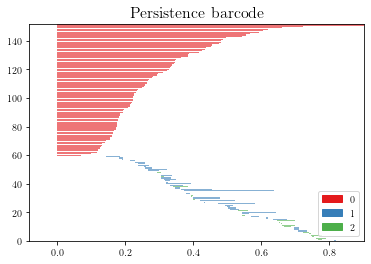

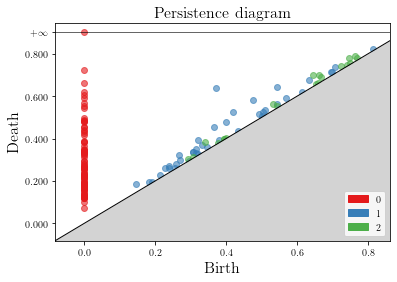

corr214423.txt


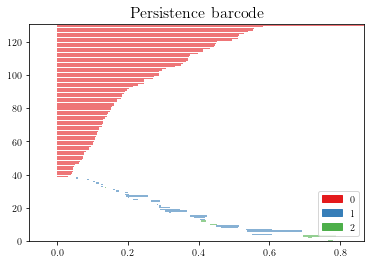

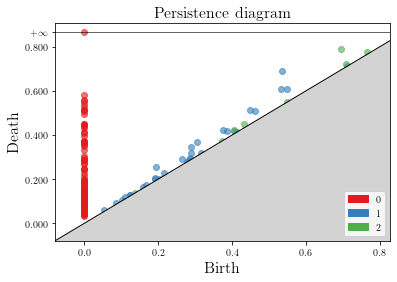

In [232]:
data_to_plot = data[0:2]

nr_dimensions = 3
for person in data_to_plot:
    
    print(person)
    
    matrix = preprocess_matrix(path_data, person)
    diag, tr = calculate_persistence(matrix, make_plots=0)
    diag_list = persistence_per_dim(tr, nr_dimensions)
    
    plot_persistence(diag)
    
#     betti_curves = calculate_betti_curves(diag_list)
#     plot_betti_curves(betti_curves)    

# Plot data

In [3]:
from os import listdir
from os.path import isfile, join
pwd = "/data/KNW/KNW-stage/m.schepers/HCP/Plots"
onlyfiles = [f for f in listdir(pwd) if isfile(join(pwd, f))]
to_plot = [f for f in onlyfiles if 'To_Plot' in f]
print(to_plot)

['To_Plot_Eulerrange_d20.npz', 'To_Plot_curv_d0.02.npz', 'To_Plot_Eulerrange_d100.npz', 'To_Plot_curv_total.npz', 'To_Plot_curv_d0.01.npz', 'To_Plot_Eulerrange_d300.npz']


In [4]:
Euler = load('/data/KNW/KNW-stage/m.schepers/HCP/Plots/To_Plot_Eulerrange_d100.npz')
curv01 = load('/data/KNW/KNW-stage/m.schepers/HCP/Plots/To_Plot_curv_d0.01.npz')
curv02 = load('/data/KNW/KNW-stage/m.schepers/HCP/Plots/To_Plot_curv_d0.02.npz')

**Euler**

In [5]:
all_Euler = []

for i in Euler:
    arr = Euler[i]
    Euler_log = np.log(np.abs(arr))
    all_Euler.append(Euler_log)

all_Euler = np.vstack(all_Euler)
all_Euler = np.transpose(all_Euler)

print(all_Euler.shape)

<ipython-input-5-06e3090719d2>:5: RuntimeWarning: divide by zero encountered in log
  Euler_log = np.log(np.abs(arr))


(100, 724)


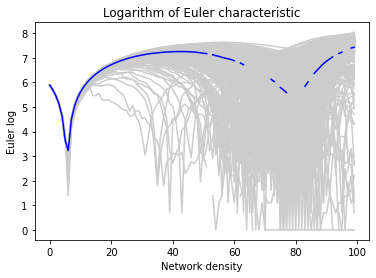

In [6]:
Euler_log_mean = np.mean(all_Euler, axis=1)

plt.plot(all_Euler, '0.8')
plt.plot(Euler_log_mean, 'b')
plt.title('Logarithm of Euler characteristic')
# plt.savefig(path_plots + 'Euler_plot.png')
plt.ylabel('Euler log')
plt.xlabel('Network density')
plt.show()
plt.close()

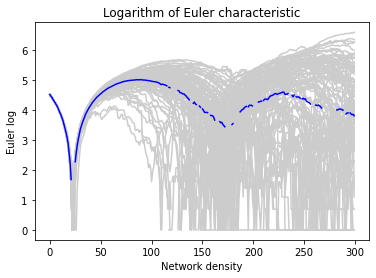

In [183]:
# OLD plot
# Euler_log_mean = np.mean(all_Euler, axis=1)

# plt.plot(all_Euler, '0.8')
# plt.plot(Euler_log_mean, 'b')
# plt.title('Logarithm of Euler characteristic')
# # plt.savefig(path_plots + 'Euler_plot.png')
# plt.ylabel('Euler log')
# plt.xlabel('Network density')
# plt.show()
# plt.close()

In [184]:
path_regions = '/data/KNW/KNW-stage/m.schepers/HCP/AAL_region_names_full.txt'

In [185]:
def import_subnetworks(path_regions):
    regions = pd.read_csv(path_regions, sep='\t')
    
    FPN = list(regions[regions['Subnetwork']=='FP'].index.values)
    DMN = list(regions[regions['Subnetwork']=='DMN'].index.values)
    FPN_names = list(regions['Region'][FPN])
    DMN_names = list(regions['Region'][DMN])
    
    all_node_names = list(regions['Region'])
    
    return FPN, DMN, FPN_names, DMN_names, all_node_names

In [186]:
FPN, DMN, FPN_names, DMN_names, all_node_names = import_subnetworks(path_regions)

**Curvature all nodes**

In [187]:
all_curv01 = []

for i in curv01:
    arr = curv01[i]
    all_curv01.append(arr)

all_curv01 = np.vstack(all_curv01)

In [188]:
all_curv02 = []

for i in curv02:
    arr = curv02[i]
    all_curv02.append(arr)

all_curv02 = np.vstack(all_curv02)

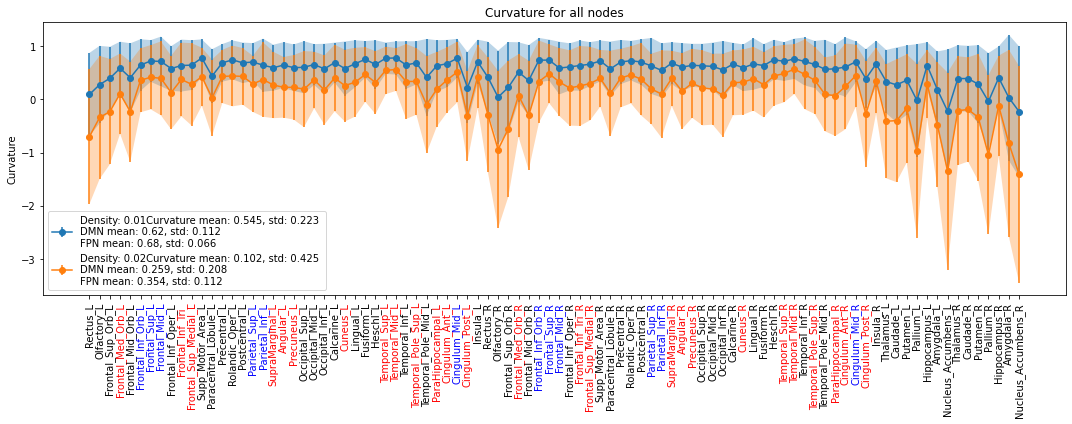

In [189]:
all_curv = np.dstack([all_curv01, all_curv02])

curv_per_density_avg = np.mean(all_curv, axis=(0))
curv_per_density_std = np.std(all_curv, axis=(0))
fig, ax = plt.subplots(figsize=(15, 6))

densities = ["0.01", "0.02"]

for i, dens in enumerate(densities):

    mean_curv_all_nodes = round(np.mean(curv_per_density_avg[:,i]),3)
    mean_curv_all_nodes_std = round(np.std(curv_per_density_avg[:,i]),3)
    mean_curv_DMN = round(np.mean(curv_per_density_avg[DMN,i]),3)
    mean_curv_DMN_std = round(np.std(curv_per_density_avg[DMN,i]),3)
    mean_curv_FPN = round(np.mean(curv_per_density_avg[FPN,i]),3)
    mean_curv_FPN_std = round(np.std(curv_per_density_avg[FPN,i]),3) 

    xvalues = range(len(curv_per_density_avg[:,i]))
    yvalues = list(curv_per_density_avg[:,i])
    error = list(curv_per_density_std[:,i])
    plt.errorbar(xvalues, yvalues, yerr=error, marker = 'o',
                 linestyle='-',
                  label=(f'Density: {dens}'
                         f'Curvature mean: {mean_curv_all_nodes}'
                         f', std: {mean_curv_all_nodes_std} \n'
                         f'DMN mean: {mean_curv_DMN}'
                         f', std: {mean_curv_DMN_std} \n'
                         f'FPN mean: {mean_curv_FPN}'
                         f', std: {mean_curv_FPN_std}'
                         ))

    ymax = [y + e for y, e in zip(yvalues, error)]
    ymin = [y - e for y, e in zip(yvalues, error)]
    plt.fill_between(xvalues, ymax, ymin, alpha=0.3)

plt.xticks(xvalues, all_node_names, rotation='vertical')
[ax.get_xticklabels()[i].set_color("red") for i in DMN]
[ax.get_xticklabels()[i].set_color("blue") for i in FPN]
plt.title('Curvature for all nodes')
plt.ylabel('Curvature')
plt.legend()
plt.tight_layout()
# plt.savefig(path_plots + 'Curvature_all_nodes.png')
plt.show()
plt.close()

**Curvature DMN**

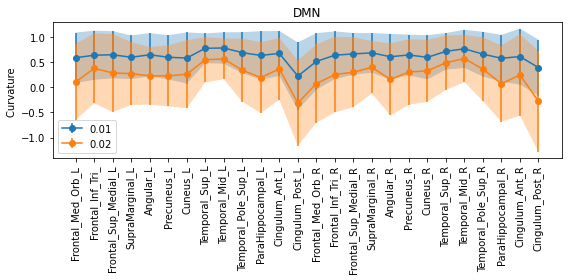

In [205]:
DMN_per_density = curv_per_density_avg[DMN]
DMN_per_density_std = curv_per_density_std[DMN]

fig, ax = plt.subplots(figsize=(8, 4))

for i, dens in enumerate(densities):
    
    xvalues = range(len(DMN_per_density[:,i]))
    yvalues = list(DMN_per_density[:,i])
    error = list(DMN_per_density_std[:,i])
    plt.errorbar(xvalues, yvalues, yerr=error, marker = 'o',
                 linestyle='-', label=str(dens))
    ymax = [y + e for y, e in zip(yvalues, error)]
    ymin = [y - e for y, e in zip(yvalues, error)]
    plt.fill_between(xvalues, ymax, ymin, alpha=0.3)

plt.title('DMN')
plt.ylabel('Curvature ')
plt.legend()
plt.xticks(xvalues, DMN_names, rotation='vertical')
plt.tight_layout()
# plt.savefig(path_plots + 'Curvature_DMN_nodes.png')
plt.show()
plt.close()  


**Curvature FPN**

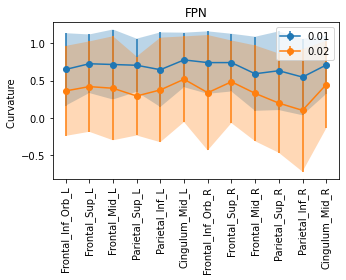

In [204]:
FPN_per_density = curv_per_density_avg[FPN]
FPN_per_density_std = curv_per_density_std[FPN]

fig, ax = plt.subplots(figsize=(5, 4))

for i, dens in enumerate(densities):
    
    xvalues = range(len(FPN_per_density[:,i]))
    yvalues = list(FPN_per_density[:,i])
    error = list(FPN_per_density_std[:,i])
    plt.errorbar(xvalues, yvalues, yerr=error, marker = 'o',
                 linestyle='-', label=str(dens))
    ymax = [y + e for y, e in zip(yvalues, error)]
    ymin = [y - e for y, e in zip(yvalues, error)]
    plt.fill_between(xvalues, ymax, ymin, alpha=0.3)

plt.title('FPN')
plt.ylabel('Curvature ')
plt.legend()
plt.xticks(xvalues, FPN_names, rotation='vertical')
plt.tight_layout()
# plt.savefig(path_plots + 'Curvature_DMN_nodes.png')
plt.show()
plt.close()  

**Curvature DMN and FPN combined**

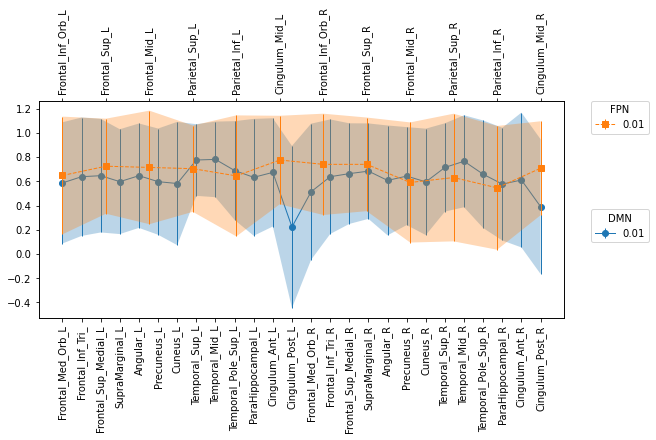

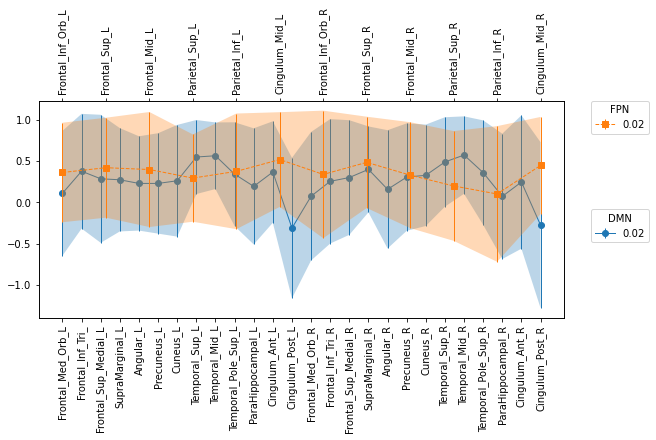

In [199]:

custom_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) +
              cycler(lw=[1, 2, 3, 4]))
custom_cycler2 = (cycler(color=['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']) +
      cycler(lw=[1, 2, 3, 4]))

for i, dens in enumerate(densities):

    fig, ax = plt.subplots(constrained_layout=True, figsize=(9,6))
    ax.set_prop_cycle(custom_cycler)
    ax2 = ax.twiny()
    ax2.set_prop_cycle(custom_cycler2)

    xvaluesDMN = range(len(DMN_per_density[:,i]))
    yvaluesDMN = list(DMN_per_density[:,i])
    errorDMN = list(DMN_per_density_std[:,i])

    xvaluesFPN = range(len(FPN_per_density[:,i]))
    yvaluesFPN = list(FPN_per_density[:,i])
    errorFPN = list(FPN_per_density_std[:,i])

    ax.errorbar(xvaluesDMN, yvaluesDMN, yerr=errorDMN, marker = 'o',
                linestyle='-', label=str(dens))
    ymaxDMN = [y + e for y, e in zip(yvaluesDMN, errorDMN)]
    yminDMN = [y - e for y, e in zip(yvaluesDMN, errorDMN)]
    ax.fill_between(xvaluesDMN, ymaxDMN, yminDMN, alpha=0.3)

    ax2.errorbar(xvaluesFPN, yvaluesFPN, yerr=errorFPN, marker = 's',
                 linestyle='--', label=str(dens))
    ymaxFPN = [y + e for y, e in zip(yvaluesFPN, errorFPN)]
    yminFPN = [y - e for y, e in zip(yvaluesFPN, errorFPN)]
    ax2.fill_between(xvaluesFPN, ymaxFPN, yminFPN, alpha=0.3)

    ax.set_xticks(xvaluesDMN, minor=False)
    ax.set_xticklabels(DMN_names, rotation='vertical') 
    ax.legend(title = 'DMN', loc = 'upper left',
              bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

    ax2.set_xticks(xvaluesFPN, minor=False)
    ax2.set_xticklabels(FPN_names, rotation='vertical')  
    ax2.legend(title = 'FPN' ,loc='upper left',
               bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)         

#     plt.savefig(path_plots + 'Curvature_DMN_FPN' + str(dens) + '.png')
    plt.show()
